In [1]:
include("../src/models.jl")
include("../src/special.jl")
include("../src/solvers.jl")

using Plots
using ProgressBars
using LinearAlgebra

In [2]:
p = 1000
N = 120
ω = 1.0
ρ = 0.05
τ = 0.5
β = 0.27
T = 15
σ = 1.0
ts = Array{Float64}(0:T*p) / p

ϕ(x) = zeros(size(x))
normdims(X, dims) = sqrt.(sum(X .^ 2, dims=dims))
cossim(X, y) = (X * y) ./ (norm(y) * normdims(X, 2));

In [3]:
Q_mc = zeros((N, T*p+1))
X_mc = zeros((N, T*p+1, p))
Ξ = zeros((N, p))

for n ∈ ProgressBar(1:N)
    ξ, spiked = spikedmodel(ρ, p, ω, σ)
    Ξ[n, :] = ξ
    X = online(spiked, ϕ, τ, T)
    X_mc[n, :, :] = X
    Q_mc[n, :] = cossim(X, ξ')
end

100.0%┣█████████████████████████████████████┫ 120/120 [01:30:16<00:00, 0.0 it/s]


In [12]:
using JLD

save("../data/oja_mc.jld", "Q_mc", Float32.(Q_mc), 
                           "Xi_mc", Float32.(Ξ), 
                           "X_mc", Float32.(X_mc))

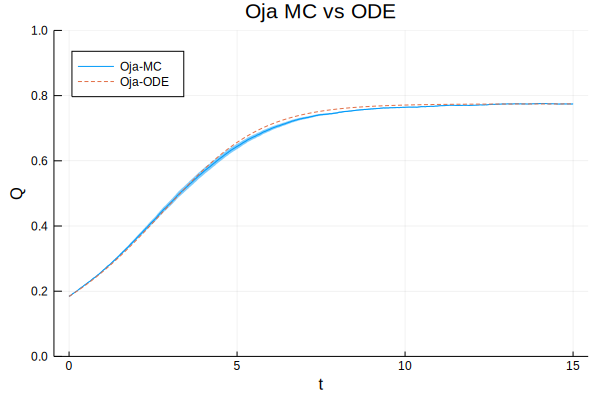

In [25]:
plt = plot(ts, mean(Q_mc, dims=1)[1,:], ribbon=var(Q_mc, dims=1)[1,:], label="Oja-MC", legend=:topleft,
     xlabel="t", ylabel="Q")
Q₀ = mean(Q_mc[:, 1])
plot!(plt, ts, ode(ts, Q₀, τ, ω), label="Oja-ODE", linestyle=:dash, title="Oja MC vs ODE")
ylims!(0, 1)